In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip '/content/drive/MyDrive/Yolo_training/data_set_ready.zip'

Streaming output truncated to the last 5000 lines.
  inflating: data_set/valid/images/traffic-light-100-_jpg.rf.88de17807d7253e710f2893a35d2d7a4.jpg  
  inflating: data_set/valid/images/traffic-light-1000-_jpg.rf.03a4c365c2e9ad57d82be835314218d8.jpg  
  inflating: data_set/valid/images/traffic-light-104-_jpg.rf.2223150f8d26a3c62a01d25f11cbd3dd.jpg  
  inflating: data_set/valid/images/traffic-light-111-_jpg.rf.3a5d9aa0457ee6d1d5ccc32bbbd0f00b.jpg  
  inflating: data_set/valid/images/traffic-light-111-_jpg.rf.56a78f561717e4c40ce90631de17a7bd.jpg  
  inflating: data_set/valid/images/traffic-light-115-_jpg.rf.b06d6c237c3145a1085a99af5e647b63.jpg  
  inflating: data_set/valid/images/traffic-light-116-_jpg.rf.b43040cfc0eb512bd464d0f05fa43ec7.jpg  
  inflating: data_set/valid/images/traffic-light-116-_jpg.rf.d14c7372c36896cdbcfdd39e54353943.jpg  
  inflating: data_set/valid/images/traffic-light-118-_jpg.rf.a36703cbad17e11abba63fe9709d0907.jpg  
  inflating: data_set/valid/images/traffic-light

In [2]:
!nvidia-smi

Wed Oct  2 17:10:14 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
import os
os.chdir('/content/drive/MyDrive/Yolo_training')

In [4]:
ls

data_set_ready.zip  data.yaml  runs/  yolo_training.ipynb  yolov8n.pt  yolov8s.pt


In [5]:
!pip install ultralytics

import ultralytics
ultralytics.checks()

Ultralytics 8.3.3 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 36.5/112.6 GB disk)


In [6]:
from ultralytics import YOLO
from IPython.display import display, Image

In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data=data.yaml epochs=25 batch=128 plots=True

100% 21.5M/21.5M [00:00<00:00, 171MB/s]
Ultralytics YOLOv8.2.100 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=25, time=None, patience=100, batch=128, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, s

In [7]:
ls /content/drive/MyDrive/Yolo_training/runs/detect/train

args.yaml                                           R_curve.png          val_batch0_labels.jpg
confusion_matrix_normalized.png                     results.csv          val_batch0_pred.jpg
confusion_matrix.png                                results.png          val_batch1_labels.jpg
events.out.tfevents.1727171898.91545f28b190.4229.0  train_batch0.jpg     val_batch1_pred.jpg
F1_curve.png                                        train_batch1.jpg     val_batch2_labels.jpg
labels_correlogram.jpg                              train_batch2.jpg     val_batch2_pred.jpg
labels.jpg                                          train_batch3810.jpg  weights/
P_curve.png                                         train_batch3811.jpg
PR_curve.png                                        train_batch3812.jpg


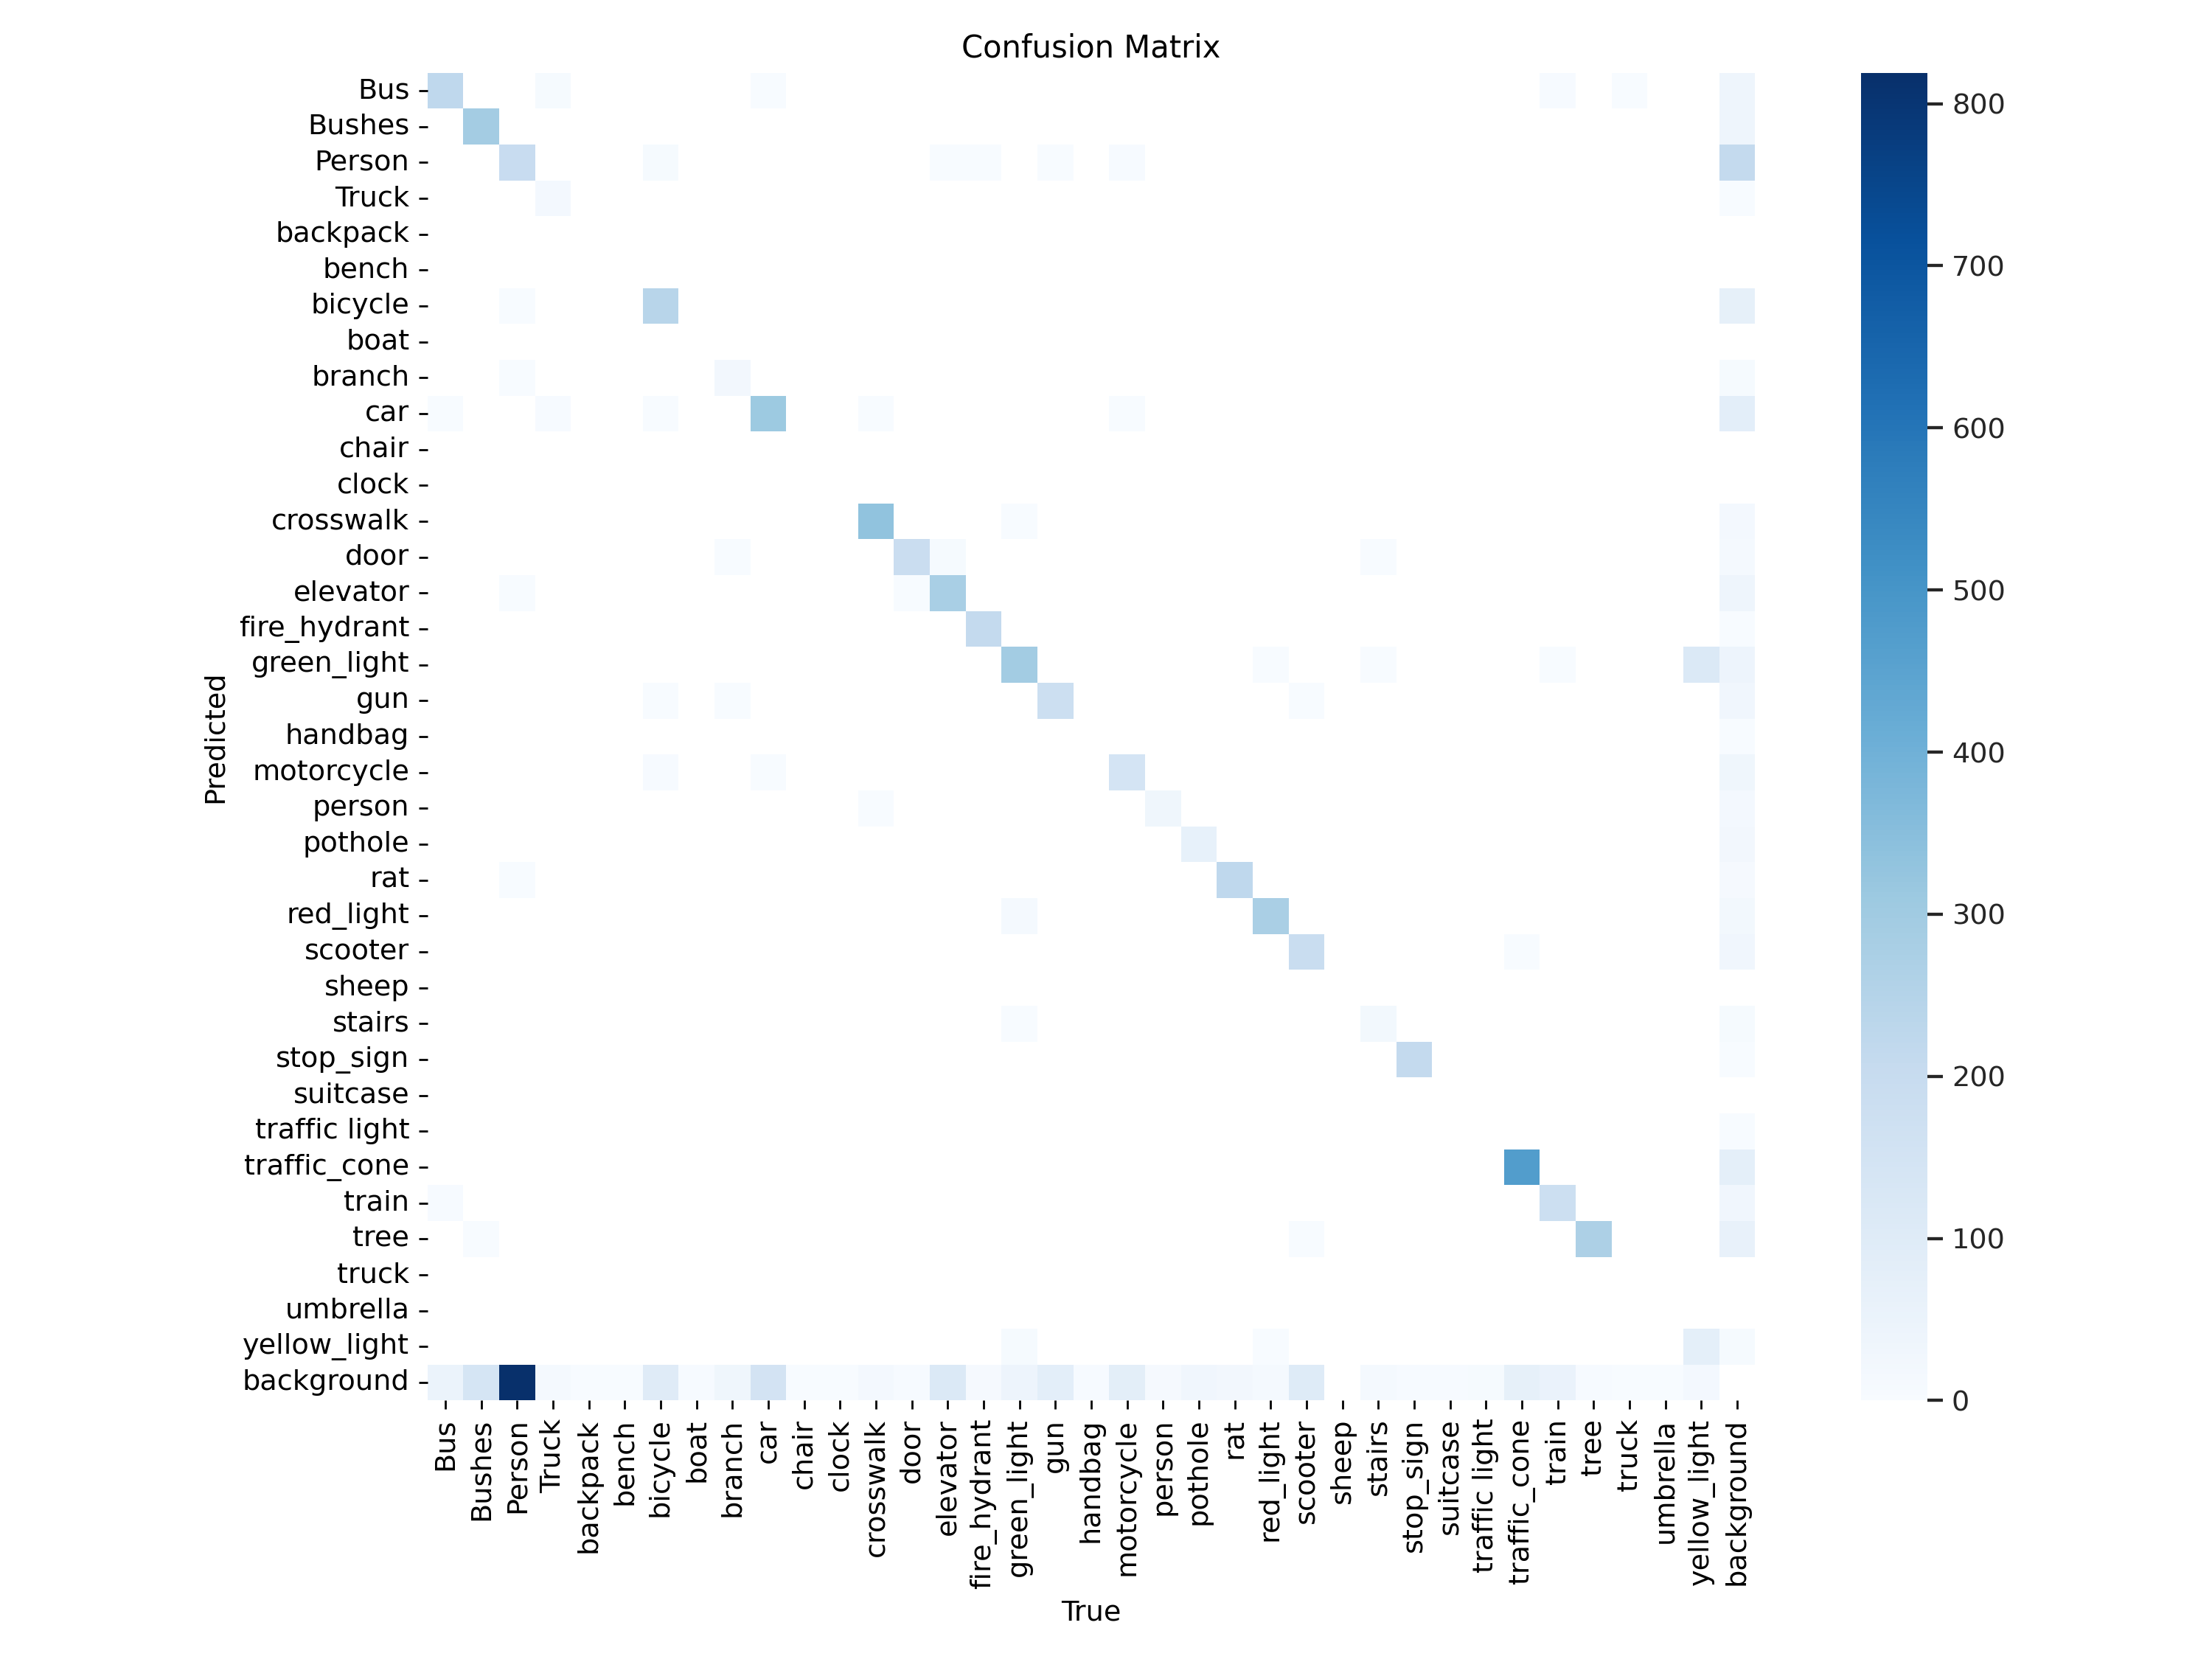

In [8]:
Image(filename=f'/content/drive/MyDrive/Yolo_training/runs/detect/train/confusion_matrix.png', width=600)

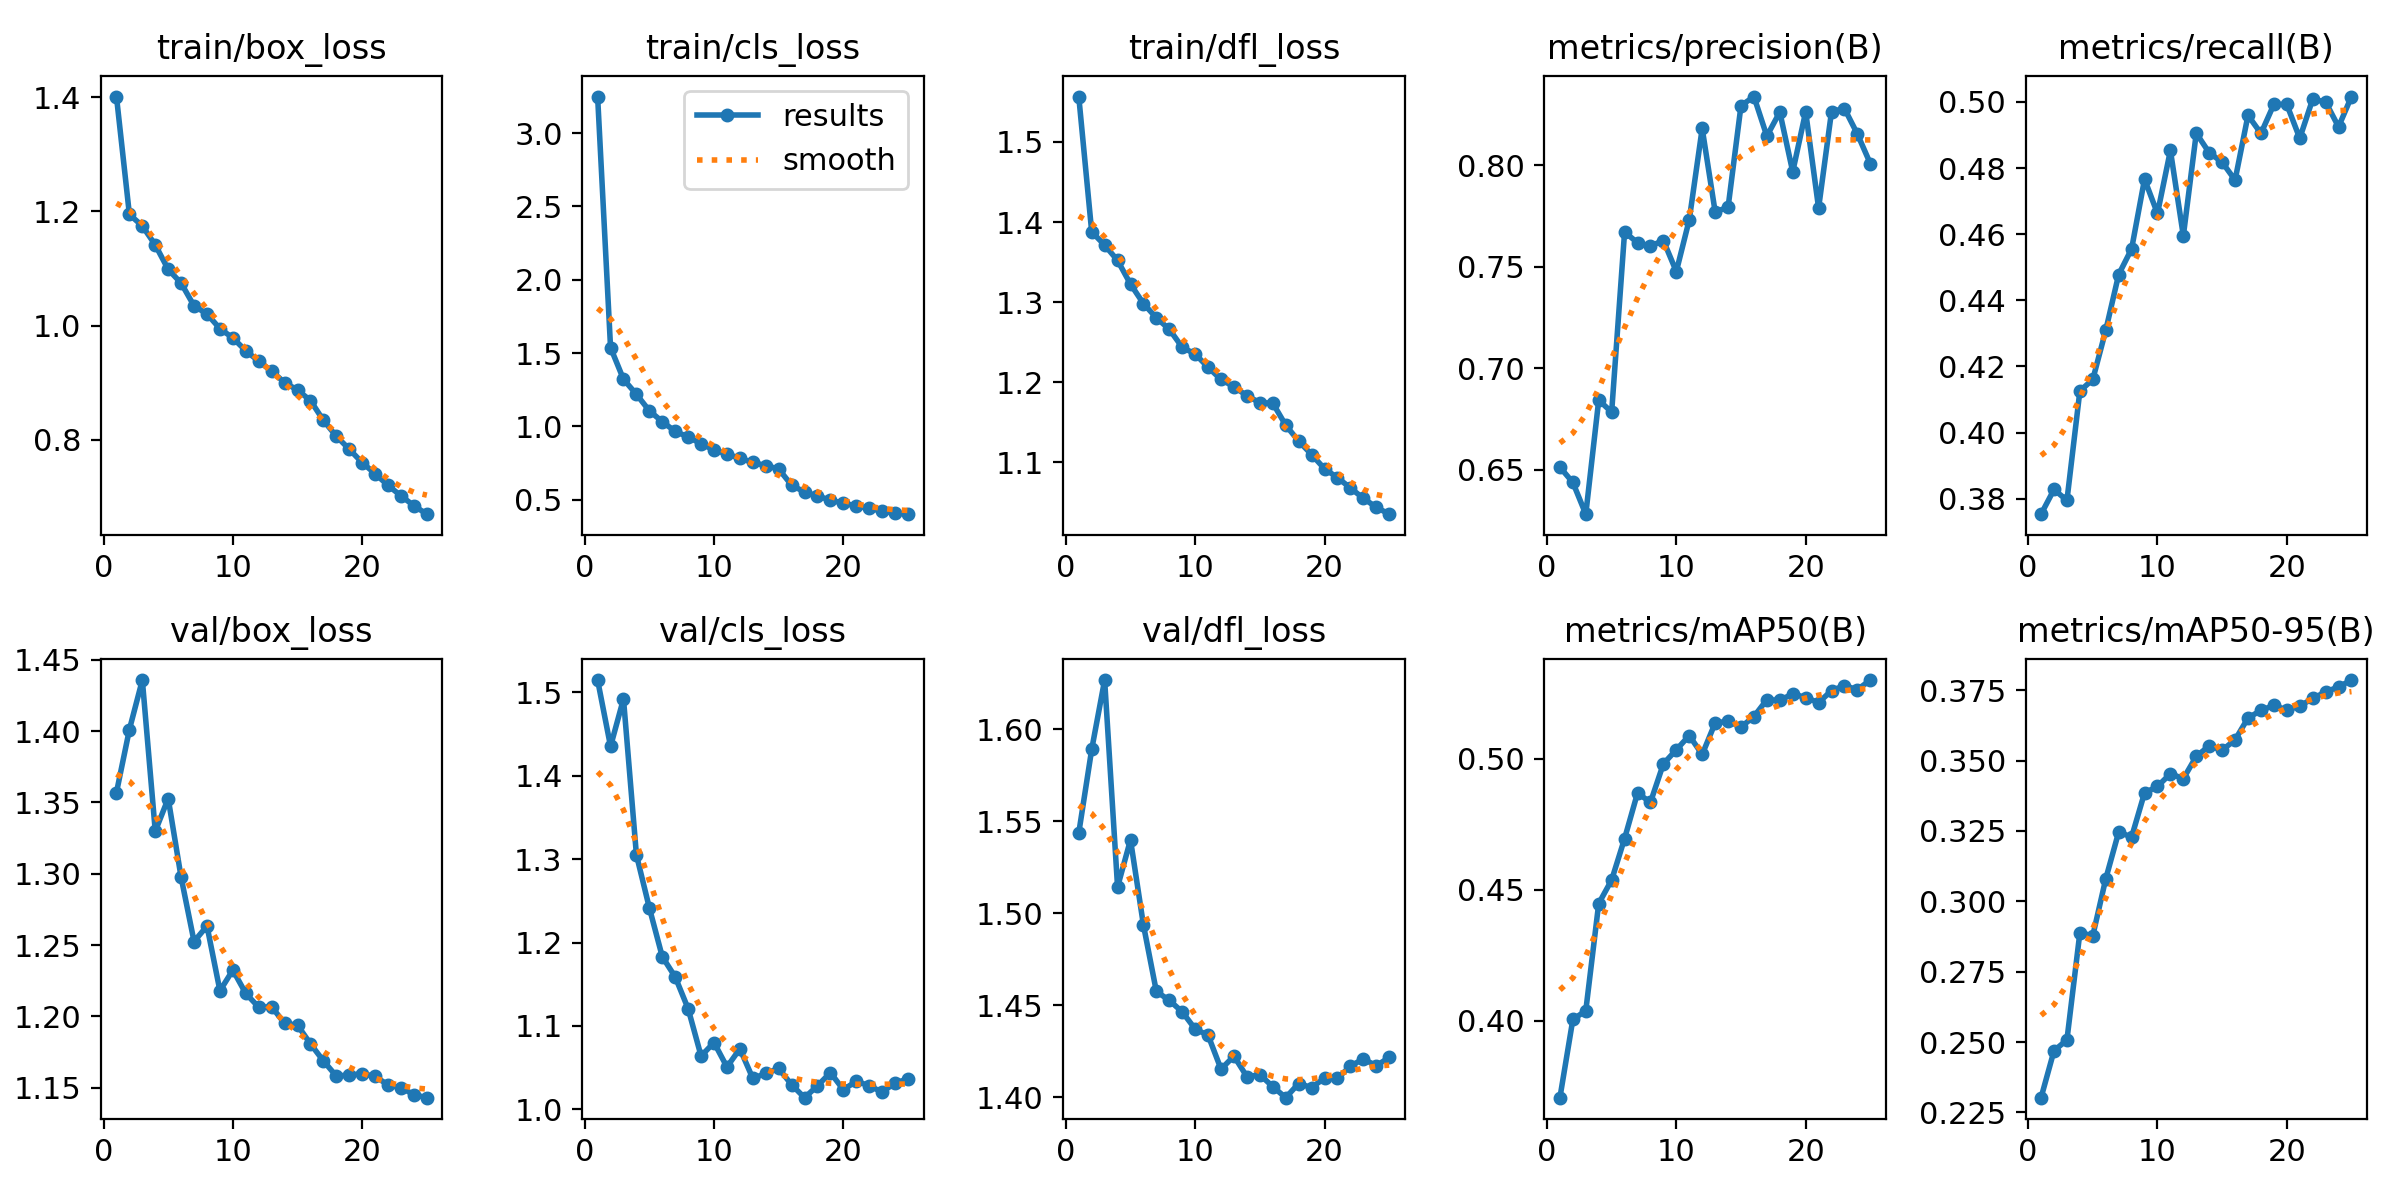

In [ ]:
Image(filename=f'/content/drive/MyDrive/Yolo_training/runs/detect/train/results.png', width=600)

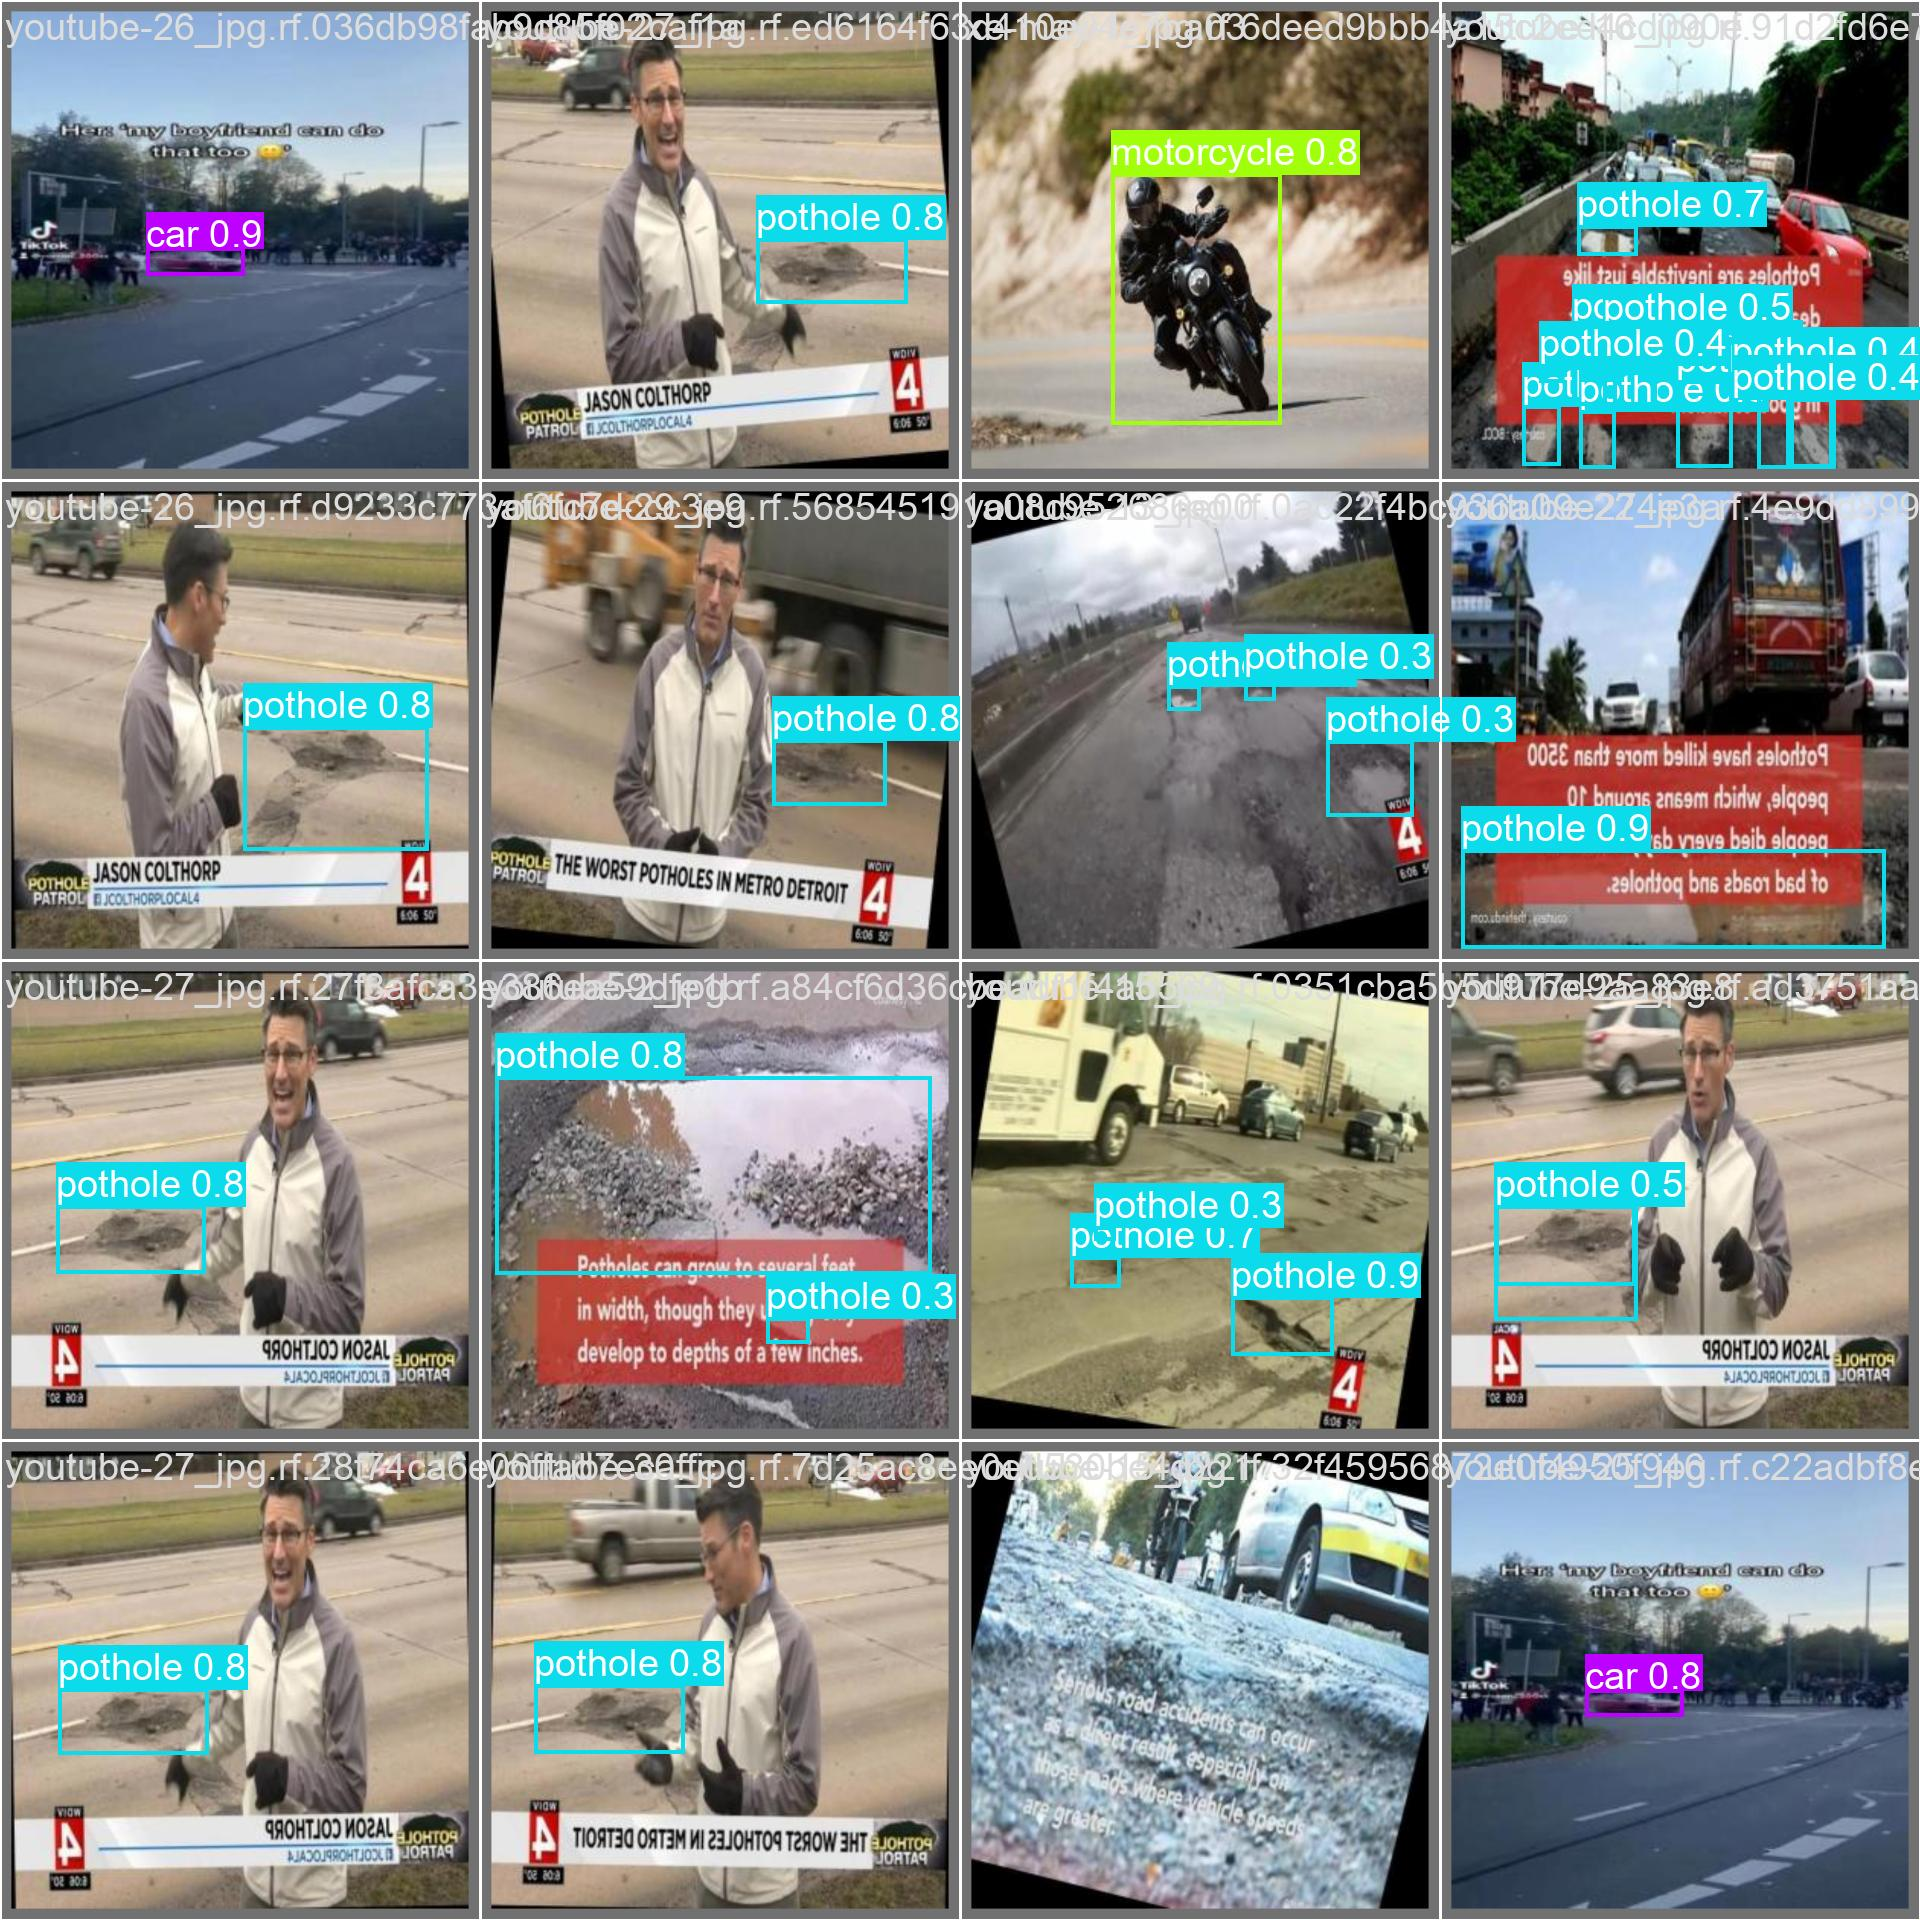

In [ ]:
Image(filename=f'/content/drive/MyDrive/Yolo_training/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
!yolo task=detect mode=val model=/content/drive/MyDrive/Yolo_training/runs/detect/train/weights/best.pt data=/content/drive/MyDrive/Yolo_training/data.yaml

Ultralytics YOLOv8.2.100 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,139,516 parameters, 0 gradients, 28.5 GFLOPs
100% 755k/755k [00:00<00:00, 121MB/s]
val: Scanning /content/data_set/valid/labels... 4189 images, 57 backgrounds, 0 corrupt: 100% 4246/4246 [00:02<00:00, 1749.69it/s]
val: New cache created: /content/data_set/valid/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 266/266 [00:56<00:00,  4.73it/s]
                   all       4246       7242      0.801      0.501       0.53      0.379
                   Bus        203        275      0.807      0.793      0.814      0.667
                Bushes        207        437      0.837      0.664       0.74      0.531
                Person        191       1023      0.426      0.174      0.185     0.0866
                 Truck         37         45      0.947      0.395      0.485      0.404
              backpack     

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/Yolo_training/runs/detect/train/weights/best.pt conf=0.25 source=/content/data_set/test/images save=True

Ultralytics YOLOv8.2.100 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,139,516 parameters, 0 gradients, 28.5 GFLOPs

image 1/2165 /content/data_set/test/images/-0573F94C-289D-4503-A571-94C6C8C5674C-png_jpg.rf.203ce892cfb5f1007edfffc3583c559c.jpg: 640x640 1 car, 20.8ms
image 2/2165 /content/data_set/test/images/-13AD8372-CDDB-4DCF-B8F9-DC10D210064B-png_jpg.rf.e8217e5555bb565dc324989173877f5a.jpg: 640x640 1 car, 32.1ms
image 3/2165 /content/data_set/test/images/-1F999A49-2799-4FBC-811D-D10A165F8B02-png_jpg.rf.8fc376c8a650e3c8839e8342a3f26c00.jpg: 640x640 1 car, 24.6ms
image 4/2165 /content/data_set/test/images/-2-_jpeg_jpg.rf.c1f6abdd0cff3a6bf353478bc921328b.jpg: 640x640 1 door, 20.2ms
image 5/2165 /content/data_set/test/images/-2526BBBE-6B96-49DC-94B9-880E133FA549-png_jpg.rf.aa9a18ed7c7033b8b15e8b819ad92558.jpg: 640x640 1 car, 20.0ms
image 6/2165 /content/data_set/test/images/-2B9B8378-CF94-4121-9F57-AA504E361DEC-png_jpg.rf.179e73b0

In [ ]:
!yolo export model=/content/drive/MyDrive/Yolo_training/runs/detect/train/weights/best.pt format=onnx  # creates 'yolov8n.onnx'

Ultralytics YOLOv8.2.101 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.00GHz)
Model summary (fused): 168 layers, 11,139,516 parameters, 0 gradients, 28.5 GFLOPs

PyTorch: starting from '/content/drive/MyDrive/Yolo_training/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 40, 8400) (21.5 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim==0.1.34', 'onnxruntime'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.3/140.3 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 181.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 228.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 190.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 204.7 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 7.6s, installed 3 packages: ['onnx>=1.12.0', 'onnxslim==0.1.34', 'onnxruntime']
requireme

In [20]:
model = YOLO('/content/drive/MyDrive/Yolo_training/runs/detect/train/weights/best.pt')
results = model('/content/drive/MyDrive/Yolo_training/2113097-hd_1280_720_30fps.mp4', save=True, save_crop=True, project="runs/detect", name="inference", exist_ok=True)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/812) /content/drive/MyDrive/Yolo_training/2113097-hd_1280_720_30fps.mp4: 384x640 (no detections), 11.5ms
video 1/1 (frame 2/812) /content/drive/MyDrive/Yolo_training/2113097-hd_1280_720_30fps.mp4: 384x640 (no detections), 14.0ms
video 1/1 (frame 3/812) /content/drive/MyDrive/Yolo_training/2113097-hd_1280_720_30fps.mp4: 384x640 2 red_lights, 10.8ms
video 1/1 (frame 4/812) /content/drive/MyDrive/Yolo_training/2113097-hd_1280_720_30fps.

In [15]:
print(results)

[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'Bus', 1: 'Bushes', 2: 'Person', 3: 'Truck', 4: 'backpack', 5: 'bench', 6: 'bicycle', 7: 'boat', 8: 'branch', 9: 'car', 10: 'chair', 11: 'clock', 12: 'crosswalk', 13: 'door', 14: 'elevator', 15: 'fire_hydrant', 16: 'green_light', 17: 'gun', 18: 'handbag', 19: 'motorcycle', 20: 'person', 21: 'pothole', 22: 'rat', 23: 'red_light', 24: 'scooter', 25: 'sheep', 26: 'stairs', 27: 'stop_sign', 28: 'suitcase', 29: 'traffic light', 30: 'traffic_cone', 31: 'train', 32: 'tree', 33: 'truck', 34: 'umbrella', 35: 'yellow_light'}
obb: None
orig_img: array([[[ 17,  28,  26],
        [ 22,  33,  31],
        [ 33,  44,  42],
        ...,
        [ 19,  36,  33],
        [ 20,  37,  34],
        [ 20,  37,  34]],

       [[ 15,  26,  24],
        [ 15,  26,  24],
        [ 16,  29,  27],
        ...,
        [ 20,  37,  34],
        [ 20,  37,  34],
        [